## Import All Required Library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

## Read Csv File

In [2]:
d1 = pd.read_csv('data\\ensemble-random-xgboost\\bank-additional-full.csv',sep=';')


FileNotFoundError: [Errno 2] No such file or directory: 'data\\ensemble-random-xgboost\\bank-additional-full.csv'

###  Make a copy of csv File

In [ ]:
df = d1.copy()

In [ ]:
df.shape

###  Understand The Data

In [ ]:
df.describe()

In [ ]:
df.head()

#  EDA

>> **Find Missing Values**

In [3]:
df.isnull().sum().sort_values(ascending=False)

NameError: name 'df' is not defined

<AxesSubplot:>

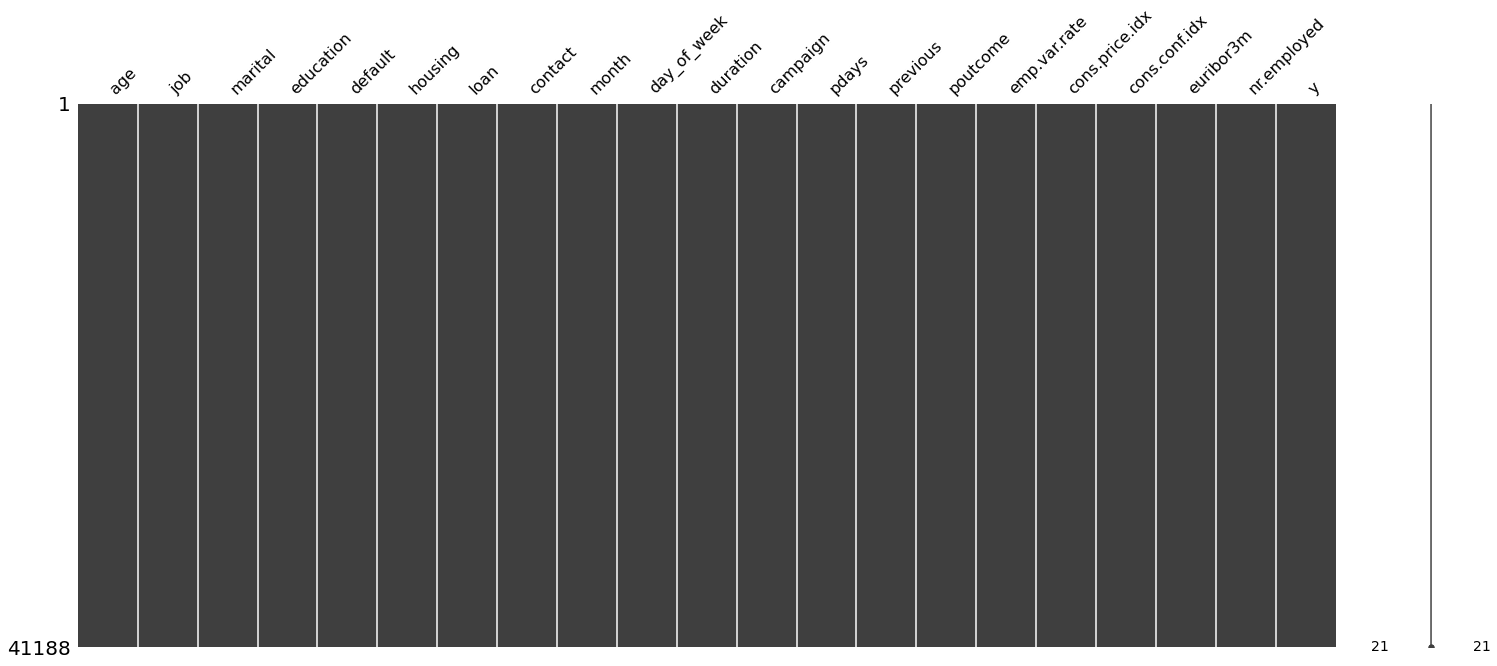

In [83]:
import missingno as mn
mn.matrix(df)


> **No Missing Values Found In DataSet By Above EDA**

## Devide The Data Into Catagories and Numeric

In [84]:
cat_col = [i for i in df.columns if df[i].dtype=='object']

##  Check All Unique Values Present In Catagorical Columns

In [85]:
for i in cat_col:
    print(i,'---->',df[i].unique())
    print('------')

job ----> ['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']
------
marital ----> ['married' 'single' 'divorced' 'unknown']
------
education ----> ['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']
------
default ----> ['no' 'unknown' 'yes']
------
housing ----> ['no' 'yes' 'unknown']
------
loan ----> ['no' 'yes' 'unknown']
------
contact ----> ['telephone' 'cellular']
------
month ----> ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep']
------
day_of_week ----> ['mon' 'tue' 'wed' 'thu' 'fri']
------
poutcome ----> ['nonexistent' 'failure' 'success']
------
y ----> ['no' 'yes']
------


<AxesSubplot:>

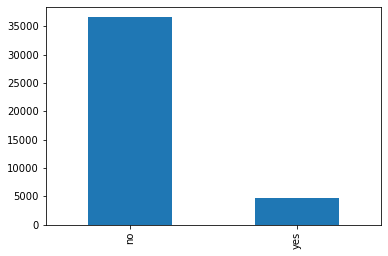

In [86]:
pd.Series(df['y'].value_counts()).plot(kind='bar')

In [87]:
num_col = [i for i in df.columns if df[i].dtype!='object']

In [88]:
df[num_col]

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0
...,...,...,...,...,...,...,...,...,...,...
41183,73,334,1,999,0,-1.1,94.767,-50.8,1.028,4963.6
41184,46,383,1,999,0,-1.1,94.767,-50.8,1.028,4963.6
41185,56,189,2,999,0,-1.1,94.767,-50.8,1.028,4963.6
41186,44,442,1,999,0,-1.1,94.767,-50.8,1.028,4963.6


#  Feature Engineering

###  Checking All Unique Values Present in Catagorical Columns

In [89]:
for i in cat_col:
    print(i,'---->',df[i].unique())
    print('------')

job ----> ['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']
------
marital ----> ['married' 'single' 'divorced' 'unknown']
------
education ----> ['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']
------
default ----> ['no' 'unknown' 'yes']
------
housing ----> ['no' 'yes' 'unknown']
------
loan ----> ['no' 'yes' 'unknown']
------
contact ----> ['telephone' 'cellular']
------
month ----> ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep']
------
day_of_week ----> ['mon' 'tue' 'wed' 'thu' 'fri']
------
poutcome ----> ['nonexistent' 'failure' 'success']
------
y ----> ['no' 'yes']
------


###  Feature Engineerning 

## 1.y variable

In [90]:
y = {'no':0,'yes':1}

In [91]:
df['y']=df['y'].map(y)

##  2. poutcome

In [92]:
po = {'failure':0,'success':1,'nonexistent':2}

In [93]:
df['poutcome'] = df['poutcome'].map(po)

## 3. day of week

In [94]:
day = {'mon':1,'tue':2,'wed':3,'thu':4,'fri':5}

In [95]:
df['day_of_week'] = df['day_of_week'].map(day)

## 4. Month

In [96]:
month = {'mar':0,'apr':1,'may':2,'jun':3,'jul':4,'aug':5,'sep':6,'oct':7,'nov':8,'dec':9}

In [97]:
df['month'] = df['month'].map(month)

## 5. contact

In [98]:
contact= {'telephone':0,'cellular':1}

In [99]:
df['contact'] = df['contact'].map(contact)

## 6. loan

In [100]:
loan = {'no':0,'yes':1,'unknown':2}

In [101]:
df['loan'] = df['loan'].map(loan)

## 7. Housing

In [102]:
ho = {'no':0,'yes':1,'unknown':2}

In [103]:
df['housing'] = df['housing'].map(ho) 

## 8.default

In [104]:
de = {'no':0,'yes':1,'unknown':2}

In [105]:
df['default'] = df['default'].map(de)

## 9.education

In [106]:
ed = {'illiterate':0,'high.school':1,'basic.4y':2,'basic.6y':3,
      'basic.9y':5,'professional.course':7,'university.degree':4,'unknown':6}

In [107]:
df['education'] = df['education'].map(ed)

## 10. marital

In [108]:
ma = {'single':0,'married':1,'divorced':2,'unknown':3}

In [109]:
df['marital'] = df['marital'].map(ma)

## 11.Job

In [110]:
jb = {'unemployed':0,'student':1,'retired':3,'housemaid':2,
      'technician':4,'management':5,'self-employed':6,'services':7,'entrepreneur':8,
     'admin.':9,'blue-collar':10,'unknown':11}

In [111]:
df['job'] = df['job'].map(jb)

In [112]:
df['job']

0         2
1         7
2         7
3         9
4         7
         ..
41183     3
41184    10
41185     3
41186     4
41187     3
Name: job, Length: 41188, dtype: int64

## Correlation

In [113]:
cor=df.corr()
cor = np.tril(cor,k=1)

<AxesSubplot:>

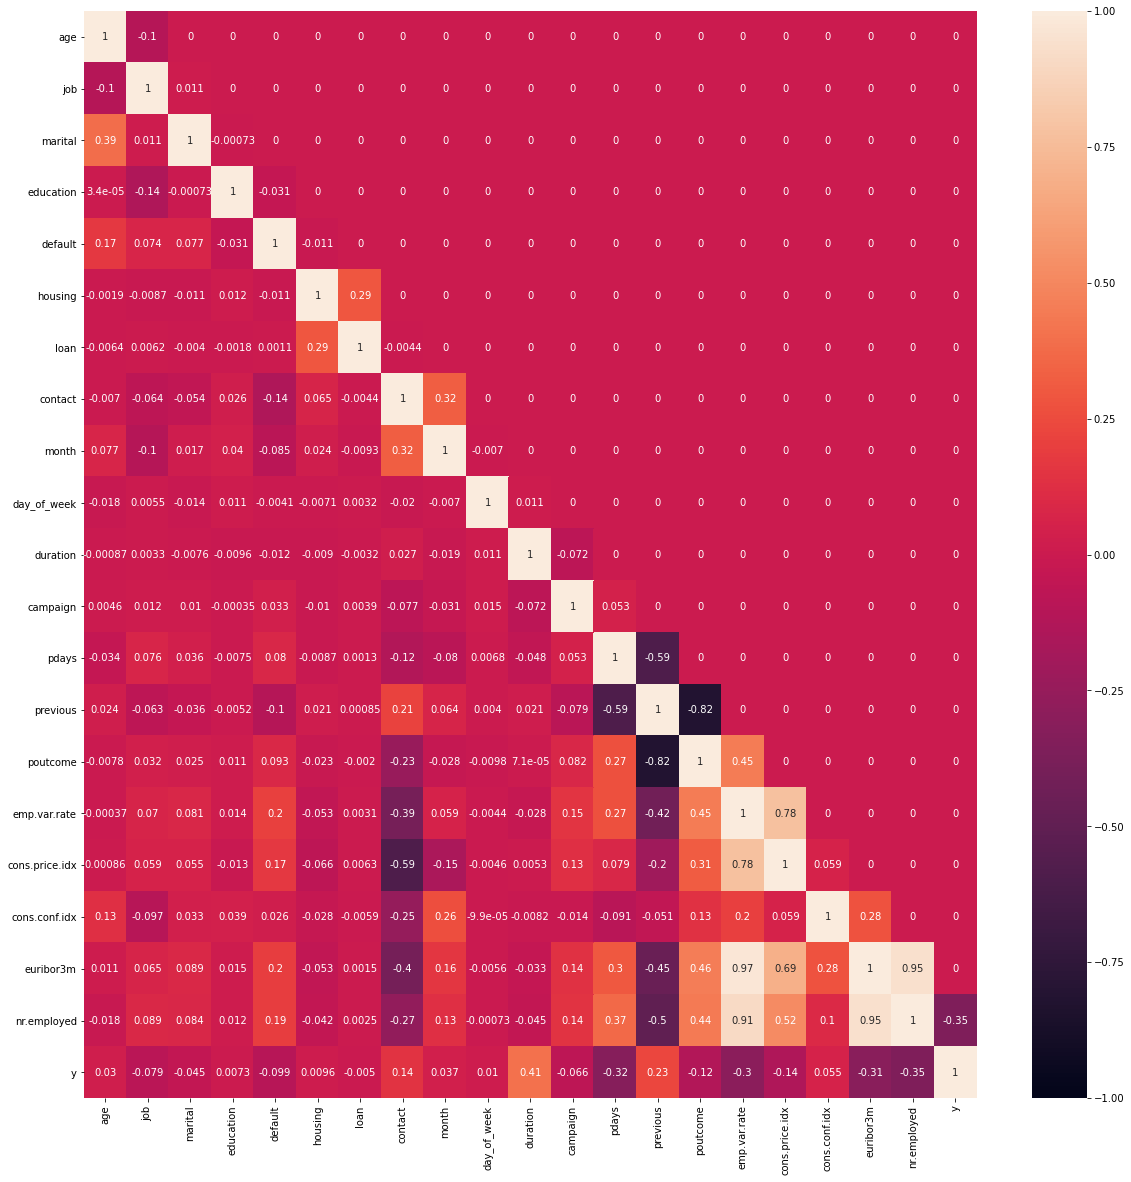

In [114]:
plt.figure(figsize=(20,20))
sns.heatmap(cor,annot=True,vmin=-1,vmax=1,xticklabels=df.columns,yticklabels=df.columns)

> **Based on Correlation Matrix remove correlared features**

In [115]:
remove_f = ['previous','cons.price.idx','nr.employed']

## To Keep Columns Name Using List Comprehension
### Remove unnecessary feature which shows multicolinarity

In [116]:
col = [i for i in df.columns if i not in remove_f]

In [117]:
df = df[col]

###  Verify the Dataset 

In [118]:
df.shape

(41188, 18)

## Import All Required Librarys For Machine Learing Model Building And Evalutions 

In [179]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from sklearn.model_selection import cross_val_score,KFold,StratifiedKFold
from xgboost import XGBClassifier

# Goal(Matrix) :

## Here from the problem statement we can conclude that we try to reduce FPR rather than FNR because if he actually not investing in company and predicted as investing that is bad for company hence try to reduce FPR.

###  Train-Test Splits

In [120]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [121]:
X.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,poutcome,emp.var.rate,cons.conf.idx,euribor3m
0,56,2,1,2,0,0,0,0,2,1,261,1,999,2,1.1,-36.4,4.857
1,57,7,1,1,2,0,0,0,2,1,149,1,999,2,1.1,-36.4,4.857
2,37,7,1,1,0,1,0,0,2,1,226,1,999,2,1.1,-36.4,4.857
3,40,9,1,3,0,0,0,0,2,1,151,1,999,2,1.1,-36.4,4.857
4,56,7,1,1,0,0,1,0,2,1,307,1,999,2,1.1,-36.4,4.857


In [122]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: y, dtype: int64

###  Resuffle the Dataset

In [123]:
X=X.sample(frac=1)
y=y.sample(frac=1)

In [124]:
trainx1,testx1,trainy1,testy1 = train_test_split(X,y,test_size=0.3)

###  Verify the train-test Splits

In [125]:
print(trainx1.shape)
print(trainy1.shape)
print(testx1.shape)
print(testy1.shape)

(28831, 17)
(28831,)
(12357, 17)
(12357,)


# 1.Bagging

## Random Forest

In [126]:
rf = RandomForestClassifier().fit(trainx1,trainy1)

In [127]:
p1 = rf.predict(testx1)
p1 = pd.Series(p1)

In [128]:
testy1.value_counts()

0    10974
1     1383
Name: y, dtype: int64

In [129]:
p1.value_counts()

0    12337
1       20
dtype: int64

### Reports & Matrix

In [130]:
confusion_matrix(testy1,p1)

array([[10956,    18],
       [ 1381,     2]], dtype=int64)

In [131]:
print(classification_report(testy1,p1))

              precision    recall  f1-score   support

           0       0.89      1.00      0.94     10974
           1       0.10      0.00      0.00      1383

    accuracy                           0.89     12357
   macro avg       0.49      0.50      0.47     12357
weighted avg       0.80      0.89      0.84     12357



##  HyperParameter Tunning Using Randomized SearchCV And GridSearchCV

## 1. RandomizedSearchCV

In [ ]:
l1 = np.arange(0,0.0001,0.00001)
l2 = np.arange(100,150,5)
class_weight=[{0:i,1:j} for i,j in zip(l1,l2)]
   

In [ ]:
param = {
    'n_estimators' : np.arange(100,1000,100),
    'criterion'    : ['gini','entropy'],
    'max_depth'    : np.arange(3,21,2),
    'min_samples_split' : np.arange(5,27,2),
    'max_features' : ["auto", "sqrt", "log2"],
    'ccp_alpha'    : np.arange(0,0.01,0.001),
    'max_samples'  : np.arange(5,100,10),
    'class_weight' : class_weight
    
    
}

### Use StratifiesKFold For cross-validations and "ACCURACY" As a Performance measure

In [ ]:
cv=StratifiedKFold(n_splits=10,shuffle=True)

In [ ]:
rmscv = RandomizedSearchCV(estimator=RandomForestClassifier(),param_distributions=param,
                           n_iter=40,scoring='accuracy',n_jobs=7,cv=cv,verbose=5)

In [ ]:
rand  = rmscv.fit(trainx1,trainy1)

### Best Parameters Using RandomizedSeachCV

In [ ]:
rand.best_estimator_

In [ ]:
trainx1 = trainx1.sample(frac=1)
trainy1 = trainy1.sample(frac=1)

In [ ]:
rf_n = RandomForestClassifier(class_weight={0: 0.00002, 1: 125}, max_depth=9,
                       max_features='log2', max_samples=5, min_samples_split=25,
                       n_estimators=600).fit(trainx1,trainy1)

In [ ]:
p2=rf_n.predict(testx1)
p2=pd.Series(p2)

In [ ]:
testy.value_counts()

In [ ]:
p2.value_counts()

###  Reports And Matrix

In [ ]:
confusion_matrix(testy1,p2)

In [ ]:
print(classification_report(testy1,p2))

## Oversampling 
### Hence This dataset is Highly Imbalance Dataset Apply Oversampling

In [132]:
from imblearn.over_sampling import SMOTE

In [133]:
oversample = SMOTE(sampling_strategy=0.6)

In [134]:
X_s1,y_s1 = oversample.fit_resample(X,y)

In [136]:
print(y_s1.value_counts())
print(y.value_counts())

0    36548
1    21928
Name: y, dtype: int64
0    36548
1     4640
Name: y, dtype: int64


In [137]:
print(X.shape)
print(y.shape)

(41188, 17)
(41188,)


In [138]:
print(X_s1.shape)
print(y_s1.shape)

(58476, 17)
(58476,)


### Train-Test Split On Oversample Dataset

In [139]:
trainx_s1,testx_s1,trainy_s1,testy_s1 = train_test_split(X_s1,y_s1,test_size=0.3)

In [140]:
print(trainx_s1.shape)
print(trainy_s1.shape)
print(testx_s1.shape)
print(testy_s1.shape)

(40933, 17)
(40933,)
(17543, 17)
(17543,)


### Model Building and Reports Of Oversample Datasets

In [141]:
rf1 = RandomForestClassifier().fit(trainx_s1,trainy_s1)

In [142]:
p3 = rf1.predict(testx_s1)
p3 = pd.Series(p3)

In [143]:
testy_s1.value_counts()

0    10990
1     6553
Name: y, dtype: int64

In [144]:
p3.value_counts()

0    12516
1     5027
dtype: int64

In [145]:
confusion_matrix(testy_s1,p3)

array([[10724,   266],
       [ 1792,  4761]], dtype=int64)

In [146]:
print(classification_report(testy_s1,p3))

              precision    recall  f1-score   support

           0       0.86      0.98      0.91     10990
           1       0.95      0.73      0.82      6553

    accuracy                           0.88     17543
   macro avg       0.90      0.85      0.87     17543
weighted avg       0.89      0.88      0.88     17543



##  RandomizedSearchCv
### Apply  RandomizedSearchCv On Oversampling Dataset

In [ ]:
li1 = np.arange(0,0.1,0.01)
li2 = np.linspace(0,5,10)


cw = [{0:i,1:j} for i,j in zip(li1,li2)]


In [ ]:
param_s = {
    'n_estimators' : np.arange(100,1000,100),
    'criterion'    : ['gini','entropy'],
    'max_depth'    : np.arange(3,21,2),
    'min_samples_split' : np.arange(5,27,2),
    'max_features' : ["auto", "sqrt", "log2"],
    'ccp_alpha'    : np.arange(0,0.01,0.001),
    'max_samples'  : np.arange(5,100,10),
    'class_weight' : cw
   
    
    
}

### Set RandomizesSearchCV

In [ ]:
rcv = RandomizedSearchCV(estimator=rf1,param_distributions=param_s,n_iter=40,n_jobs=-1,cv=cv,verbose=7,scoring='accuracy')

### Fit RandomizedSearchCV

In [ ]:
rcv_ms = rcv.fit(trainx_s1,trainy_s1)

In [ ]:
rcv_ms.best_params_


## Model Building On Tunned Parameter

In [ ]:
rf2 = RandomForestClassifier(n_estimators= 300,
 min_samples_split= 9,
 max_samples= 25,
 max_features= 'log2',
 max_depth= 13,
 criterion= 'entropy',
 class_weight= {0:0.5, 1:5},
 ccp_alpha= 0.003).fit(trainx_s,trainy_s)

## Cross-Validations For Model we make

### 1. For Train

In [ ]:
np.mean(cross_val_score(rf2,trainx_s1,trainy_s1,scoring='accuracy',cv=cv,n_jobs=-1))

### 2.For Test

In [ ]:
np.mean(cross_val_score(rf2,testx_s1,testy_s1,scoring='accuracy',cv=cv,n_jobs=-1))

### Predictions On Test Dataset

In [ ]:
p4 = rf2.predict(testx_s1)
p4 = pd.Series(p4)

### checking Values count

In [ ]:
testy_s.value_counts()

In [ ]:
p4.value_counts()

### Reports &  Matrix

In [ ]:
confusion_matrix(testy_s1,p4)

In [ ]:
print(classification_report(testy_s1,p4))

# Feature Selections (R.Forest)

In [149]:
from sklearn.feature_selection import RFE

In [150]:
features1=list(testx_s.columns)

In [151]:
fs1 = RFE(rf,n_features_to_select=10,verbose=5)

In [152]:
fs1.fit(trainx_s1,trainy_s1)

Fitting estimator with 17 features.
Fitting estimator with 16 features.
Fitting estimator with 15 features.
Fitting estimator with 14 features.
Fitting estimator with 13 features.
Fitting estimator with 12 features.
Fitting estimator with 11 features.


RFE(estimator=RandomForestClassifier(), n_features_to_select=10, verbose=5)

In [154]:
support1 = fs1.support_
ranking1 = fs1.ranking_

In [155]:
df_fs = pd.DataFrame({'feature':features1,'support':support1,'ranking':ranking1})

In [156]:
df_fs1=df_fs.sort_values(by='ranking',axis=0)

In [157]:
df_fs1

,feature,support,ranking
0,age,True,1
14,emp.var.rate,True,1
11,campaign,True,1
10,duration,True,1
9,day_of_week,True,1
15,cons.conf.idx,True,1
16,euribor3m,True,1
4,default,True,1
3,education,True,1
1,job,True,1


In [158]:
filt1=df_fs1['ranking']==1

In [159]:
selected_f1 = df_fs1.loc[filt1]['feature'].to_list()

In [162]:
fs_x1 = X_s[selected_f1]
fs_y1 = y_s

In [163]:
print(fs_x1.shape)
print(fs_y1.shape)

(58476, 10)
(58476,)


### Train-Test Splits On Selected Features

In [164]:
train_fs_x1,test_fs_x1,train_fs_y1,test_fs_y1 = train_test_split(fs_x1,fs_y1,test_size=0.3)

In [165]:
print(train_fs_x1.shape)
print(train_fs_y1.shape)
print(test_fs_x1.shape)
print(test_fs_y1.shape)


(40933, 10)
(40933,)
(17543, 10)
(17543,)


### Model Building On Selected Features 

In [166]:
rf3 = RandomForestClassifier().fit(train_fs_x1,train_fs_y1)

In [ ]:
p5 = rf3.predict(test_fs_x1)
p5 = pd.Series(p5)

In [ ]:
test_fs_y1.value_counts()

In [ ]:
p5.value_counts()

### Matrix & Reports

In [ ]:
confusion_matrix(test_fs_y1,p5)

In [ ]:
print(classification_report(test_fs_y1,p5))

##  RandomizedSearchCv
### Apply Hyperparameter Tunning On Selected Feature and Build New Model

In [ ]:
list1 = np.arange(0,0.1,0.01)
list2 = np.linspace(0,10,10)


class_weight1= [{0:i,1:j} for i,j in zip(list1,list2)]


In [ ]:
param_fs = {
    'n_estimators' : np.arange(100,1000,100),
    'criterion'    : ['gini','entropy'],
    'max_depth'    : np.arange(3,21,2),
    'min_samples_split' : np.arange(5,27,2),
    'max_features' : ["auto", "sqrt", "log2"],
    'ccp_alpha'    : np.arange(0,0.01,0.001),
    'max_samples'  : np.arange(5,100,10),
    'class_weight' : class_weight1
   
    
    
}

In [ ]:
r = RandomizedSearchCV(estimator=rf3,param_distributions=param_fs,n_iter=100,cv=cv,scoring='recall',verbose=5,n_jobs=-1)

### Fit the Model

In [ ]:
rv=r.fit(train_fs_x1,train_fs_y1)

In [ ]:
rv.best_params_

### Build the Model 
### Model Building On Tunned Parameters

In [ ]:
rf4 = RandomForestClassifier(n_estimators= 600,
 min_samples_split= 13,
 max_samples= 65,
 max_features= 'sqrt',
 max_depth= 19,
 criterion= 'gini',
 class_weight= {0: 2, 1:8.9},
 ccp_alpha= 0.009000000000000001).fit(train_fs_x,train_fs_y)

In [ ]:
p6 = rf4.predict(test_fs_x1)
p6 = pd.Series(p6)

In [ ]:
test_fs_y1.value_counts()

In [ ]:
p6.value_counts()

### Reports & Matrix

In [ ]:
confusion_matrix(test_fs_y1,p6)

In [ ]:
print(classification_report(test_fs_y1,p6))

### Cross-Validations on Final Model

#### 1.Train-Dataset

In [ ]:
np.mean(cross_val_score(rf4,train_fs_x1,train_fs_y1,cv=cv,scoring='accuracy',n_jobs=-1))

#### 2. Test-Dataset

In [ ]:
np.mean(cross_val_score(rf4,test_fs_x1,test_fs_y1,cv=cv,scoring='accuracy',n_jobs=-1))

## Compare All Models Build So Far

## 1. Base Model

In [ ]:
confusion_matrix(testy1,p1)

In [ ]:
print(classification_report(testy1,p1))

##  2. Base Model With Hyperparameter Tunning (RandomizedSearchCV)

In [ ]:
confusion_matrix(testy1,p2)

In [ ]:
print(classification_report(testy1,p2))

## 3. Base Model With Oversampling Technique

In [ ]:
confusion_matrix(testy_s1,p3)

In [ ]:
print(classification_report(testy_s1,p3))

## 4. Base Model Oversampling with Hyperparameter Technique(RandomizedSearchCV)

In [ ]:
confusion_matrix(testy_s1,p4)

In [ ]:
print(classification_report(testy_s1,p4))

## 5.Feature Selection Model

In [ ]:
confusion_matrix(test_fs_y1,p5)

In [ ]:
print(classification_report(test_fs_y1,p5))

## 6.Feature Selection Model with HyperParameter Tunning (RandomisedSearch Cv)

In [ ]:
confusion_matrix(test_fs_y1,p6)

In [ ]:
print(classification_report(test_fs_y1,p6))

### from above comparizon we say model number 5 is Best among all

### export model 5 In pickle file so can save time

In [ ]:
import pickle

In [ ]:
filename = 'rf.pkl'

In [ ]:
pickle.dump(rf3,open(filename,'wb'))

In [ ]:
model = pickle.load(open(filename,'rb'))

### Verify Pickle Model Below

In [ ]:
p7=model.predict(test_fs_x1)

In [ ]:
confusion_matrix(test_fs_y1,p7)

# 2.Boosting

## 1.ADA Boost

In [178]:
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier

## Model Building

In [180]:
ad1 = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1),n_estimators=100,algorithm='SAMME.R').fit(trainx_s,trainy_s)

In [181]:
pred1 = ad1.predict(testx_s1)
pred1 = pd.Series(pred1)

In [182]:
testy_s.value_counts()

0    10953
1     6590
Name: y, dtype: int64

In [183]:
pred1.value_counts()

0    13000
1     4543
dtype: int64

### Reports & Matrix

In [184]:
confusion_matrix(testy_s1,pred1)

array([[10245,   745],
       [ 2755,  3798]], dtype=int64)

In [185]:
print(classification_report(testy_s1,pred1))

              precision    recall  f1-score   support

           0       0.79      0.93      0.85     10990
           1       0.84      0.58      0.68      6553

    accuracy                           0.80     17543
   macro avg       0.81      0.76      0.77     17543
weighted avg       0.81      0.80      0.79     17543



## Hyperparameter Tunning Using Randomized and GridSearch CV
## 1.Randomized Search CV

In [186]:
cv =StratifiedKFold(n_splits=10,shuffle=True)

In [ ]:
parameter = {
    'n_estimators' : np.arange(50,400,50),
    'learning_rate':[0.0001,0.0005,0.0007,0.001,0.005,0.007,0.01,0.03,0.07,0.1,0.3,0.7,1]
}

In [ ]:
rcv_ada = RandomizedSearchCV(estimator=ad1,param_distributions=parameter,n_iter=35,scoring='accuracy',n_jobs=-1,cv=cv,verbose=5,)

In [ ]:
random=rcv_ada.fit(trainx_s1,trainy_s1)

## 2.GridSearch CV

In [ ]:
random.best_params_

In [ ]:
grid_para = {
    'n_estimators' :[random.best_params_['n_estimators']-100,[random.best_params_['n_estimators']-50,random.best_params_['n_estimators']
                     ,random.best_params_['n_estimators']+50],random.best_params_['n_estimators']+100],
    'learning_rate':[random.best_params_['learning_rate']-0.2,random.best_params_['learning_rate']-0.1,random.best_params_['learning_rate']
                     ,random.best_params_['learning_rate']+0.1,random.best_params_['learning_rate']+0.2]
    
}

In [ ]:
grid = GridSearchCV(estimator=ad1,param_grid=grid_para,scoring='accuracy',n_jobs=-1,cv=cv,verbose=5)

In [ ]:
grid_cv = grid.fit(trainx_s1,trainy_s1)

In [ ]:
grid_cv.best_params_

### Model Build Using Tunned Parameter.

In [ ]:
ad2 = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1,class_weight={0:0.99,1:2.1}),algorithm='SAMME.R',
                         learning_rate =  1.2 ,n_estimators= 450).fit(trainx_s,trainy_s)

In [ ]:
pred2 = ad2.predict(testx_s1)
pred2 = pd.Series(pred2)

In [ ]:
testy_s1.value_counts()

In [ ]:
pred2.value_counts()

### Reports & Matrix

In [ ]:
confusion_matrix(testy_s1,pred2)

In [ ]:
print(classification_report(testy_s1,pred2))

## ROC Curve (AdaBoost) 

In [ ]:
from sklearn.metrics import roc_auc_score,roc_curve

In [ ]:
roc_auc = roc_auc_score(testy_s1,pred2)

In [ ]:
fpr,tpr,th = roc_curve(testy_s1,pred2)

In [ ]:
plt.plot(fpr,tpr,label=f'{roc_auc:.2f}')
plt.legend(loc='lower right')
plt.plot(th,th,'o-.')
plt.xlim([0,1])
plt.ylim([0,1])
plt.title('AdaBoost Classifier')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')


##  Feature Selection(AdaBoost)

In [175]:
from sklearn.feature_selection import RFE

In [187]:
rfe2 = RFE(estimator=ad1,n_features_to_select=7,verbose=5)

In [189]:
rfe_fs2=rfe2.fit(trainx_s1,trainy_s1)

Fitting estimator with 17 features.
Fitting estimator with 16 features.
Fitting estimator with 15 features.
Fitting estimator with 14 features.
Fitting estimator with 13 features.
Fitting estimator with 12 features.
Fitting estimator with 11 features.
Fitting estimator with 10 features.
Fitting estimator with 9 features.
Fitting estimator with 8 features.


In [191]:
ranking2 = rfe_fs2.ranking_

In [192]:
features2=list(trainx_s1.columns)

In [193]:
new_df2 = pd.DataFrame({'feature':features2,'ranking':ranking2})

In [194]:
new_df2 = new_df2.sort_values(by='ranking',axis=0)

In [195]:
new_df2

,feature,ranking
8,month,1
14,emp.var.rate,1
15,cons.conf.idx,1
4,default,1
16,euribor3m,1
1,job,1
3,education,1
13,poutcome,2
2,marital,3
5,housing,4


In [196]:
filt2=new_df2['ranking']==1

In [197]:
select_feature2 =  new_df2.loc[filt2]['feature'].to_list()

In [198]:
select_feature2

['month',
 'emp.var.rate',
 'cons.conf.idx',
 'default',
 'euribor3m',
 'job',
 'education']

## Model Building and Evalutions on Selected Features

In [199]:
X_fs2 = X_s1[select_feature2]
y_fs2 = y_s1

In [200]:
print(X_fs2.shape)
print(y_fs2.shape)

(58476, 7)
(58476,)


In [201]:
trainx_fs_ada,testx_fs_ada,trainy_fs_ada,testy_fs_ada = train_test_split(X_fs2,y_fs2,test_size=0.3,shuffle=True)

In [202]:
print(trainx_fs_ada.shape)
print(trainy_fs_ada.shape)
print(testx_fs_ada.shape)
print(testy_fs_ada.shape)

(40933, 7)
(40933,)
(17543, 7)
(17543,)


### Model Building And Evaluations

In [203]:
ad3 = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1)).fit(trainx_fs_ada,trainy_fs_ada)

In [204]:
pred3 = ad3.predict(testx_fs_ada)
pred3 = pd.Series(pred3)

In [205]:
testy_fs_ada.value_counts()

0    10999
1     6544
Name: y, dtype: int64

In [206]:
pred3.value_counts()

0    14637
1     2906
dtype: int64

In [207]:
confusion_matrix(testy_fs_ada,pred3)

array([[10844,   155],
       [ 3793,  2751]], dtype=int64)

In [208]:
print(classification_report(testy_fs_ada,pred3))

              precision    recall  f1-score   support

           0       0.74      0.99      0.85     10999
           1       0.95      0.42      0.58      6544

    accuracy                           0.77     17543
   macro avg       0.84      0.70      0.71     17543
weighted avg       0.82      0.77      0.75     17543



## Hyperparameter Tunning 
### Randomizedsearch CV 

In [ ]:
param_ada = {
    'learning_rate' : [0.01,0.03,0.07,0.09,0.02,0.04,0.06,0.1,0.3,0.7,0.9,0.2,0.4,0.6,0.8],
    'n_estimators'  : np.arange(100,1600,100)
    
}

In [ ]:
r = RandomizedSearchCV(estimator=ad3,param_distributions=param_ada,n_iter=35,scoring='accuracy',n_jobs=-1,cv=cv,verbose=7,)

In [ ]:
rs_ada = r.fit(trainx_fs_ada,trainy_fs_ada)

In [ ]:
rs_ada.best_params_

In [ ]:
ad4 = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1,class_weight={0:0.99,1:2.667})
                         ,n_estimators = 1300, learning_rate = 0.9).fit(trainx_fs_ada,trainy_fs_ada)

In [ ]:
pred4 = ad4.predict(testx_fs_ada)
pred4 = pd.Series(pred4)

In [ ]:
testy_fs_ada.value_counts()

In [ ]:
pred4.value_counts()

In [ ]:
confusion_matrix(testy_fs_ada,pred4)

In [ ]:
print(classification_report(testy_fs_ada,pred4))

In [ ]:
cross_val_score(ad4,trainx_fs_ada,trainy_fs_ada,scoring='accuracy',cv=cv,n_jobs=-1)

In [ ]:
cross_val_score(ad4,testx_fs_ada,testy_fs_ada,scoring='accuracy',cv=cv,n_jobs=-1)

## Compare All Models We build in AdaBoost

### 1. ADA Boost Base Model

In [ ]:
confusion_matrix(testy_s1,pred1)

In [ ]:
print(classification_report(testy_s1,pred1))

In [ ]:
roc_auc_score(testy_s1,pred1)

### 2.AdaBoost Base Model With Hyperparameter tunning with Randomized And Grid Search CV

In [ ]:
confusion_matrix(testy_s1,pred2)

In [ ]:
print(classification_report(testy_s1,pred2))

In [ ]:
roc_auc_score(testy_s1,pred2)

### 3.Adaboost With Selected(7) features

In [ ]:
confusion_matrix(testy_fs_ada,pred3)

In [ ]:
print(classification_report(testy_fs_ada,pred3))

In [ ]:
roc_auc_score(testy_fs_ada,pred3)

### 4. Adaboost Hyperparameter(RandomisedSearch CV) Tunning on Selected Features(7)

In [ ]:
confusion_matrix(testy_fs_ada,pred4)

In [ ]:
print(classification_report(testy_fs_ada,pred4))

In [ ]:
roc_auc_score(testy_fs_ada,pred4)

## By Comparing from above Parameter like auc-score,fpr,tpr,tnr,confusion-matrix,f1-score,recall,precision,sensitivity=tpr,specificity=tnr for All 4 Model We say last Model 4th number is Best

export model to save time 

In [69]:
import pickle

In [67]:
filename = 'adaboost.pkl'

In [ ]:
pickle.dump(ad4,open(filename,'wb'))

#### Verify Model by read and predict

In [209]:
m1 = pickle.load(open(filename,'rb'))

In [210]:
p1 = m1.predict(testx_fs_ada)

In [211]:
roc_auc_score(testy_fs_ada,p1)

0.5

#### Which Is equal to model 4 hence model is verify

# 2. Gredient Boost 

### 1.Base Model

In [221]:
gb1 = GradientBoostingClassifier().fit(trainx_s1,trainy_s1)

In [222]:
prediction1 = gb1.predict(testx_s1)
prediction1 = pd.Series(prediction1)

In [223]:
testy_s1.value_counts()

0    10990
1     6553
Name: y, dtype: int64

In [224]:
prediction1.value_counts()

0    13599
1     3944
dtype: int64

### ROC-AUC For Base Model

In [225]:
from sklearn.metrics import roc_auc_score,roc_curve



In [226]:
roc_auc = roc_auc_score(testy_s1,prediction1)

In [227]:
fpr,tpr,th = roc_curve(testy_s1,prediction1)

Text(0.5, 0, 'False Positive Rate')

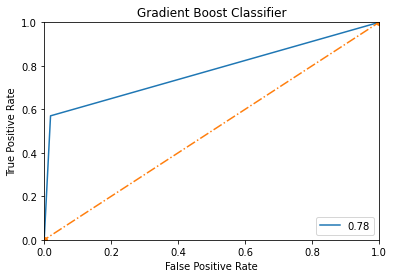

In [228]:
plt.plot(fpr,tpr,label=f'{roc_auc:.2f}')
plt.legend(loc='lower right')
plt.plot(th,th,'o-.')
plt.xlim([0,1])
plt.ylim([0,1])
plt.title('Gradient Boost Classifier')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')


## HyperParameter Tunning Using 
## Randomized Search CV

In [ ]:
para_gb = {
    'learning_rate': [0.1,0.3,0.5,0.7,0.9,0.01,0.03,0.05,0.07,0.09],
    'n_estimators' : np.arange(100,1100,100),
    'max_depth'    : np.arange(3,14),
    
    
}

In [ ]:
rgb = RandomizedSearchCV(estimator=gb1,param_distributions=para_gb,
                         n_iter=45,scoring='accuracy',n_jobs=-1,cv=cv,verbose=5)

In [ ]:
rgb_fit = rgb.fit(trainx_s1,trainy_s1)

In [ ]:
rgb_fit.best_params_

### 2. Model

In [229]:
gb2 = GradientBoostingClassifier(n_estimators= 900, max_depth= 13, learning_rate= 0.1,verbose=5).fit(trainx_s1,trainy_s1)

      Iter       Train Loss   Remaining Time 
         1           1.2387           12.61m
         2           1.1663           13.14m
         3           1.1064           13.55m
         4           1.0536           13.82m
         5           1.0074           14.05m
         6           0.9608           14.52m
         7           0.9231           14.68m
         8           0.8849           14.77m
         9           0.8483           14.86m
        10           0.8137           14.93m
        11           0.7836           14.95m
        12           0.7577           14.98m
        13           0.7315           14.91m
        14           0.7088           15.02m
        15           0.6799           15.13m
        16           0.6579           15.12m
        17           0.6370           15.12m
        18           0.6148           15.11m
        19           0.5928           15.16m
        20           0.5720           15.11m
        21           0.5545           15.06m
        2

       183           0.0404           11.48m
       184           0.0400           11.46m
       185           0.0388           11.46m
       186           0.0374           11.48m
       187           0.0367           11.47m
       188           0.0363           11.44m
       189           0.0355           11.44m
       190           0.0349           11.42m
       191           0.0340           11.43m
       192           0.0329           11.43m
       193           0.0323           11.41m
       194           0.0320           11.39m
       195           0.0311           11.39m
       196           0.0306           11.38m
       197           0.0298           11.37m
       198           0.0292           11.36m
       199           0.0285           11.36m
       200           0.0284           11.33m
       201           0.0280           11.32m
       202           0.0275           11.31m
       203           0.0272           11.29m
       204           0.0269           11.27m
       205

       366           0.0020            8.77m
       367           0.0020            8.75m
       368           0.0020            8.73m
       369           0.0019            8.72m
       370           0.0019            8.70m
       371           0.0019            8.69m
       372           0.0019            8.67m
       373           0.0018            8.65m
       374           0.0018            8.63m
       375           0.0018            8.62m
       376           0.0017            8.60m
       377           0.0017            8.59m
       378           0.0017            8.57m
       379           0.0016            8.56m
       380           0.0016            8.55m
       381           0.0016            8.53m
       382           0.0015            8.52m
       383           0.0015            8.50m
       384           0.0015            8.49m
       385           0.0015            8.48m
       386           0.0014            8.46m
       387           0.0014            8.44m
       388

       549           0.0002            5.83m
       550           0.0002            5.81m
       551           0.0002            5.80m
       552           0.0002            5.78m
       553           0.0002            5.76m
       554           0.0001            5.75m
       555           0.0001            5.73m
       556           0.0001            5.72m
       557           0.0001            5.70m
       558           0.0001            5.68m
       559           0.0001            5.67m
       560           0.0001            5.65m
       561           0.0001            5.63m
       562           0.0001            5.61m
       563           0.0001            5.60m
       564           0.0001            5.58m
       565           0.0001            5.57m
       566           0.0001            5.55m
       567           0.0001            5.53m
       568           0.0001            5.52m
       569           0.0001            5.50m
       570           0.0001            5.48m
       571

       732           0.0001            2.79m
       733           0.0001            2.77m
       734           0.0001            2.75m
       735           0.0001            2.74m
       736           0.0001            2.72m
       737           0.0001            2.70m
       738           0.0001            2.69m
       739           0.0001            2.67m
       740           0.0001            2.65m
       741           0.0001            2.64m
       742           0.0001            2.62m
       743           0.0001            2.60m
       744           0.0001            2.58m
       745           0.0001            2.57m
       746           0.0001            2.55m
       747           0.0001            2.53m
       748           0.0001            2.52m
       749           0.0001            2.50m
       750           0.0001            2.48m
       751           0.0001            2.47m
       752           0.0001            2.45m
       753           0.0001            2.44m
       754

In [230]:
prediction2 = gb2.predict(testx_s1)
prediction2 = pd.Series(prediction2)

In [ ]:
testy_s1.value_counts()

In [ ]:
prediction2.value_counts()

## Feature Selection For Gradient Boost

In [ ]:
from sklearn.feature_selection import RFE

In [ ]:
rfe3 = RFE(estimator=GradientBoostingClassifier(n_estimators=50),n_features_to_select=7,verbose=5)

In [ ]:
rfe_fs3=rfe3.fit(trainx_s1,trainy_s1)

In [ ]:
ranking3 = rfe_fs3.ranking_

In [ ]:
features3=list(trainx_s1.columns)

In [ ]:
new_df3 = pd.DataFrame({'feature':features3,'ranking':ranking3})

In [ ]:
new_df3 = new_df3.sort_values(by='ranking',axis=0)

In [ ]:
new_df3

In [ ]:
filt3=new_df3['ranking']==1

In [ ]:
select_feature3 =  new_df3.loc[filt3]['feature'].to_list()

In [ ]:
select_feature3

## Model Building and Evalutions on Selected Features

In [ ]:
X_fs3 = X_s[select_feature]
y_fs3 = y_s

In [ ]:
print(X_fs3.shape)
print(y_fs3.shape)

### Train-Test Split

In [ ]:
trainx_fs_gb,testx_fs_gb,trainy_fs_gb,testy_fs_gb = train_test_split(X_fs,y_fs,test_size=0.3,shuffle=True)

In [ ]:
print(trainx_fs_gb.shape)
print(trainy_fs_gb.shape)
print(testx_fs_gb.shape)
print(testy_fs_gb.shape)

###  Model Building For Selected Features

In [ ]:
gb3 = GradientBoostingClassifier(n_estimators=800,max_depth=13,learning_rate=0.1,verbose=5).fit(trainx_fs_gb,trainy_fs_gb)

In [ ]:
prediction3 = gb3.predict(testx_fs_gb)
prediction3 = pd.Series(prediction3)

In [ ]:
testy_fs_gb.value_counts()

In [ ]:
prediction3.value_counts()

## Compare All Gradient Boost Models Reports and Matrix Score Based On Decied Which is Best Model

### 1.Base Model

In [ ]:
confusion_matrix(testy_s1,prediction1)

In [ ]:
print(classification_report(testy_s1,prediction1))

### 2.Base Model With Hyperparameter Tunnig

In [ ]:
confusion_matrix(testy_s1,prediction2)

In [ ]:
print(classification_report(testy_s1,prediction2))

### 3. Final Model After Feature Selection

In [ ]:
confusion_matrix(testy_fs_gb,prediction3)

In [ ]:
print(classification_report(testy_fs_gb,prediction3))

### Export Trained Model So we Can Save time

In [ ]:
import pickle

In [ ]:
filename = 'gbboost.pkl'

### After Checking All Performance Measure on confusion matrix and Classification report I'll Decied 2nd Model is Best 

In [ ]:
pickle.dump(gb2,open(filename,'wb'))

#  3. XGBoost Classifier

### 1. Base Model

In [ ]:
xgb1 = XGBClassifier(n_estimators=400).fit(trainx_s1,trainy_s1)

In [ ]:
predx1= xgb1.predict(testx_s1)
predx1 = pd.DataFrame(predx1)


In [ ]:
testy_s1.value_counts()

In [ ]:
predx1.value_counts()

## HyperParameter Tunning 
## 1.GridSearch CV

In [ ]:
param_xgb = {
    'n_estimators' : np.arange(500,1200,100),
    'learning_rate' :[0.2,0.3,0.4,0.5,0.6],
    'max_depth'   : [2,3,4,5,6],
    'min_child_weight':[0,1]
   
    
    
    
    
}

In [ ]:
gxgb = GridSearchCV(estimator=XGBClassifier(),param_grid=param_xgb,scoring='accuracy',cv=3,verbose=5,n_jobs=5) 

### Fit the Grid Using GridsearchCV

In [ ]:
grid_xgboost = gxgb.fit(trainx_s,trainy_s)

In [ ]:
grid_xgboost.best_params_

## 2. Model Build Using Tunned Parameter

In [ ]:
xgb2 = grid_xgboost.best_estimator_

In [ ]:
xgb2.fit(trainx_s1,trainy_s1)

In [ ]:
predx2 = xgb2.predict(testx_s1)
predx2 = pd.Series(predx2)

In [ ]:
testy_s1.value_counts()

In [ ]:
predx2.value_counts()

### Feature Selection (XGBoost)

In [238]:
from sklearn.feature_selection import RFE

In [239]:
rfe4 = RFE(estimator=XGBClassifier(n_estimators=500,n_jobs=-1),n_features_to_select=7,verbose=5)

In [240]:
rfe_fs4=rfe4.fit(trainx_s1,trainy_s1)

Fitting estimator with 17 features.
Fitting estimator with 16 features.
Fitting estimator with 15 features.
Fitting estimator with 14 features.
Fitting estimator with 13 features.
Fitting estimator with 12 features.
Fitting estimator with 11 features.
Fitting estimator with 10 features.
Fitting estimator with 9 features.
Fitting estimator with 8 features.


In [241]:
ranking4 = rfe_fs4.ranking_

In [242]:
features4=list(trainx_s1.columns)

In [243]:
new_df4 = pd.DataFrame({'feature':features4,'ranking':ranking4})

In [244]:
new_df4 = new_df4.sort_values(by='ranking',axis=0)

In [245]:
new_df4

,feature,ranking
8,month,1
14,emp.var.rate,1
15,cons.conf.idx,1
7,contact,1
5,housing,1
16,euribor3m,1
4,default,1
9,day_of_week,2
6,loan,3
2,marital,4


In [246]:
filt4=new_df4['ranking']==1

In [247]:
select_feature4 =  new_df4.loc[filt4]['feature'].to_list()

In [248]:
select_feature4

['month',
 'emp.var.rate',
 'cons.conf.idx',
 'contact',
 'housing',
 'euribor3m',
 'default']

## Model Building and Evalutions on Selected Features

In [250]:
X_fs4 = X_s1[select_feature4]
y_fs4 = y_s1

In [251]:
print(X_fs4.shape)
print(y_fs4.shape)

(58476, 7)
(58476,)


In [253]:
trainx_fs_xg,testx_fs_xg,trainy_fs_xg,testy_fs_xg = train_test_split(X_fs4,y_fs4,test_size=0.3,shuffle=True)

In [254]:
print(trainx_fs_xg.shape)
print(trainy_fs_xg.shape)
print(testx_fs_xg.shape)
print(testy_fs_xg.shape)

(40933, 7)
(40933,)
(17543, 7)
(17543,)


### 3. Model Build On Selected Features

In [255]:
xgb3 = XGBClassifier(n_estimators = 500, n_jobs=-1).fit(trainx_fs_xg,trainy_fs_xg)

In [260]:
predx3 = xgb3.predict(testx_fs_xg)
predx3 = pd.Series(predx3)

In [261]:
testy_fs_xg.value_counts()

0    10951
1     6592
Name: y, dtype: int64

In [262]:
predx3.value_counts()

0    12763
1     4780
dtype: int64

In [263]:
confusion_matrix(testy_fs_xg,predx3)

array([[10919,    32],
       [ 1844,  4748]], dtype=int64)

In [264]:
print(classification_report(testy_fs_xg,predx3))

              precision    recall  f1-score   support

           0       0.86      1.00      0.92     10951
           1       0.99      0.72      0.84      6592

    accuracy                           0.89     17543
   macro avg       0.92      0.86      0.88     17543
weighted avg       0.91      0.89      0.89     17543



## Comparizon Of All Modes We Build InXGBoost From Confusion Matrix and Classification Report 

### 1.Base Model

In [265]:
confusion_matrix(testy_s1,predx1)

NameError: name 'predx1' is not defined

In [266]:
print(classification_report(testy_s1,predx1))

NameError: name 'predx1' is not defined

### 2.Base Model With HyperParameter Tunning

In [267]:
confusion_matrix(testy_s1,predx2)

NameError: name 'predx2' is not defined

In [268]:
print(classification_report(testy_s1,predx2))

NameError: name 'predx2' is not defined

### 3. Final Model which is Feature Selection

In [269]:
confusion_matrix(testy_fs_xg,predx3)

array([[10919,    32],
       [ 1844,  4748]], dtype=int64)

In [270]:
print(classification_report(testy_fs_xg,predx3))

              precision    recall  f1-score   support

           0       0.86      1.00      0.92     10951
           1       0.99      0.72      0.84      6592

    accuracy                           0.89     17543
   macro avg       0.92      0.86      0.88     17543
weighted avg       0.91      0.89      0.89     17543



### Export Model so We can Save Time
### From Confusion Matrix and Classification Report We say 3rd Model is Best

In [271]:
import pickle

In [272]:
filename = 'xgboost.pkl'

In [273]:
pickle.dump(xgb3,open(filename,'wb'))

verify by cross check with original model

In [274]:
model = pickle.load(open(filename,'rb'))

In [275]:
predict = model.predict(testx_fs_xg)

In [276]:
confusion_matrix(testy_fs_xg,predict)

array([[10919,    32],
       [ 1844,  4748]], dtype=int64)

In [ ]:
print(classification_report(testy_fs_xg,predict))

# Final Comparizon Of All Models Random Forest,Among Adaboost, GradientBoost and XGBoost Which Is Perform Best

In [71]:
import pickle

# 1. Random Forest

In [72]:
ran_fin = pickle.load(open('rf.pkl','rb'))

In [167]:
ran_pred = ran_fin.predict(test_fs_x1)

In [168]:
ran_pred = pd.Series(ran_pred)

In [169]:
ran_pred.value_counts()

0    10505
1     7038
dtype: int64

In [170]:
test_fs_y1.value_counts()

0    10980
1     6563
Name: y, dtype: int64

### Matrix and Reports

In [171]:
confusion_matrix(test_fs_y1,ran_pred)

array([[8714, 2266],
       [1791, 4772]], dtype=int64)

In [172]:
print(classification_report(test_fs_y1,ran_pred))

              precision    recall  f1-score   support

           0       0.83      0.79      0.81     10980
           1       0.68      0.73      0.70      6563

    accuracy                           0.77     17543
   macro avg       0.75      0.76      0.76     17543
weighted avg       0.77      0.77      0.77     17543



In [173]:
from sklearn.metrics import roc_auc_score
roc_auc_score(test_fs_y1,ran_pred)

0.7603656392421276

## 2. AdaBoost

In [212]:
ada_fin = pickle.load(open('adaboost.pkl','rb'))

In [213]:
ada_pred = ada_fin.predict(testx_fs_ada)

In [214]:
ada_pred = pd.Series(ada_pred)

In [215]:
ada_pred.value_counts()

0    17543
dtype: int64

In [216]:
testy_fs_ada.value_counts()

0    10999
1     6544
Name: y, dtype: int64

### Matrix and Reports

In [217]:
confusion_matrix(testy_fs_ada,ada_pred)

array([[10999,     0],
       [ 6544,     0]], dtype=int64)

In [218]:
print(classification_report(testy_fs_ada,ada_pred))

              precision    recall  f1-score   support

           0       0.63      1.00      0.77     10999
           1       0.00      0.00      0.00      6544

    accuracy                           0.63     17543
   macro avg       0.31      0.50      0.39     17543
weighted avg       0.39      0.63      0.48     17543



C:\Users\fenil\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [219]:
roc_auc_score(testy_fs_ada,ada_pred)

0.5

## 3. Gradient Boost

In [220]:
gb_fin = pickle.load(open('gbboost.pkl','rb'))  

In [231]:
gb_pred = gb_fin.predict(testx_s1)
gb_pred = pd.Series(gb_pred)

In [232]:
gb_pred.value_counts()

0    12104
1     5439
dtype: int64

In [233]:
testy_s1.value_counts()

0    10990
1     6553
Name: y, dtype: int64

In [234]:
confusion_matrix(testy_s1,gb_pred)

array([[10059,   931],
       [ 2045,  4508]], dtype=int64)

In [235]:
print(classification_report(testy_s1,gb_pred))

              precision    recall  f1-score   support

           0       0.83      0.92      0.87     10990
           1       0.83      0.69      0.75      6553

    accuracy                           0.83     17543
   macro avg       0.83      0.80      0.81     17543
weighted avg       0.83      0.83      0.83     17543



In [236]:
roc_auc_score(testy_s1,gb_pred)

0.8016079084699865

## 4. XGBoost

In [278]:
xg_fin = pickle.load(open('xgboost.pkl','rb'))

In [279]:
xg_pred = xg_fin.predict(testx_fs_xg)

In [280]:
confusion_matrix(testy_fs_xg,predx3)

array([[10919,    32],
       [ 1844,  4748]], dtype=int64)

In [281]:
print(classification_report(testy_fs_xg,predx3))

              precision    recall  f1-score   support

           0       0.86      1.00      0.92     10951
           1       0.99      0.72      0.84      6592

    accuracy                           0.89     17543
   macro avg       0.92      0.86      0.88     17543
weighted avg       0.91      0.89      0.89     17543



In [282]:
roc_auc_score(testy_fs_xg,predx3)

0.8586724413605886